# Описание проекта

У нас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.


/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года


/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:

- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

#   Описание данных

База данных об авиаперевозках:

Таблица **airports** — информация об аэропортах:

   - airport_code — трёхбуквенный код аэропорта
   - airport_name — название аэропорта
   - city — город
   - timezone — временная зона
   
Таблица **aircrafts** — информация об самолётах:

   - aircraft_code — код модели самолёта
   - model — модель самолёта
   - range — количество самолётов
   - Таблица tickets — информация о билетах:
   - ticket_no — уникальный номер билета
   - passenger_id — персональный идентификатор пассажира
   - passenger_name — имя и фамилия пассажира
   
Таблица **flights** — информация о рейсах:

   - flight_id — уникальный идентификатор рейса
   - departure_airport — аэропорт вылета
   - departure_time — дата и время вылета
   - arrival_airport — аэропорт прилёта
   - arrival_time — дата и время прилёта
   - aircraft_code – id самолёта
   
Таблица **ticket_flights** — стыковая таблица «рейсы-билеты»

   - ticket_no — номер билета
   - flight_id — идентификатор рейса
   
Таблица **festivals** — информация о фестивалях

   - festival_id — уникальный номер фестиваля
   - festival_date — дата проведения фестиваля
   - festival_city — город проведения фестиваля
   - festival_name — название фестиваля

# <a name="contents">Задачи исследования — Сборный проект</a>
# [1. Изучение общей информации](#stage_1)

* Путь к файлу: /datasets/query_1.csv
* Путь к файлу: /datasets/query_3.csv 
* Проверить типы данных на корректность

# [2. Исследовательский анализ данных](#stage_2)

* Выберем топ-10 городов по количеству рейсов
* Построим график моделей самолетов и количество рейсов
* Построим график города и количество рейсов
* Топ-10 городов и количество рейсов

# [3. Вывод](#stage_3)




<a name="stage_1"></a>
# Шаг 1. Откроем файл с данными и изучите общую информацию

In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [25]:
query_1 = pd.read_csv('/datasets/query_1.csv') 

In [26]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [27]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [28]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [29]:
query_1.duplicated().sum()

0

**Функция, которая даст вывод в Dataframe**
- нули
- отсутствующее значение
- % от общей стоимости
- Всего Ноль Пропущенных Значений
- % Всего Нулевых Пропущенных Значений
- тип данных

In [30]:
def missing_zero_values_table(query_1):
        zero_val = (query_1 == 0.00).astype(int).sum(axis=0)
        mis_val = query_1.isnull().sum()
        mis_val_percent = 100 * query_1.isnull().sum() / len(query_1)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(query_1)
        mz_table['Data Type'] = query_1.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(query_1.shape[1]) + " columns and " + str(query_1.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(query_1)

Your selected dataframe has 2 columns and 8 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


Мы имеем таблицу с моделями самолета и количество рейсов для каждой модели в сентябре 2018 года, размер выбороки составляет 8 строк и 2 столбца. Таблица состоит из вещественных чисел и строк. Типы данных соответствуют, пропусков нет, дубликатов нет. Выглядит приемлимо.

***

In [31]:
query_3 = pd.read_csv('/datasets/query_3.csv')

In [32]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [33]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [34]:
# Приведем к столбец average_flights к нужному типу int
query_3['average_flights'] = query_3['average_flights'].astype('int')

In [35]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [36]:
# Тут все хорошо с данными
query_3.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


In [37]:
query_3.duplicated().sum()

0

In [38]:
def missing_zero_values_table(query_3):
        zero_val = (query_3 == 0.00).astype(int).sum(axis=0)
        mis_val = query_3.isnull().sum()
        mis_val_percent = 100 * query_3.isnull().sum() / len(query_3)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(query_1)
        mz_table['Data Type'] = query_3.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(query_1.shape[1]) + " columns and " + str(query_3.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(query_3)

Your selected dataframe has 2 columns and 101 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


Мы имеем таблицу о городах и среднем количестве рейсов, прибывающих в город за день в августе 2018 годас, размер выбороки составляет 101 строк и 2 столбца. Таблица состоит из вещественных чисел и строк. Типы данных соответствуют, привели столбец average_flights к нужному типу int, пропусков нет, дубликатов нет. Выглядит приемлимо.

<a name="stage_2"></a>
# Шаг 2. Проведем исследовательский анализ данных

**Выберем топ-10 городов по количеству рейсов**

In [39]:
top_10 = query_3.groupby("city", as_index = False).agg({'average_flights' : "max"})\
.sort_values('average_flights', ascending = False).head(10)

In [40]:
top_10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


********

**Построим график моделей самолетов и количество рейсов**

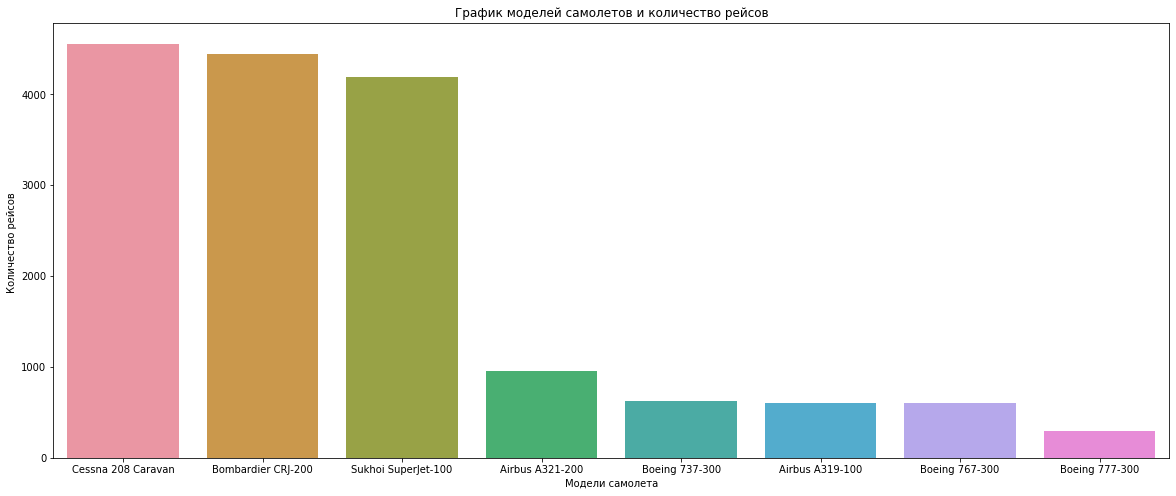

In [41]:
# Созданим функцию
platform_on_sales = query_1.pivot_table(
    index='model', values='flights_amount', aggfunc='sum').sort_values(by='flights_amount', ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['flights_amount'])
plt.title("График моделей самолетов и количество рейсов")
plt.xlabel("Модели самолета")
plt.ylabel("Количество рейсов ");

**Вывод:**
Самолеты моделей  Cessna 208 Caravan, Bombardier CRJ-200, и Sukhoi SuperJet-100 совершают значительно большее количество полетов по сравнению с другими моделями. Меньше всего перелетов у крупнейшего Boeing 777-300 

Cessna 208 Caravan «Сессна 208» — лёгкий американский турбовинтовой одномоторный самолёт общего применения с шасси, которое не убирается. Небольшие самолеты на 9-13 мест, летают по небольшому количеству маршрутво и сугубо на короткие расстояния, обслуживают только направления с малым пассажиропотоком. И это логично, вместимость-то малая

Bombardier CRJ-200 имеют повышенные эксплуатационные характеристики: данный тип способен выполнять полёты в сложных метеорологических условиях и в условиях высокогорных аэродромов, самолет на 50 мест, география намного более объемная, чем у "Cessna". Летают на средние расстояния, присутствуют высокозагруженные направления (кроме Санкт-Петербург-Москва и обратно). Это Utair;

Sukhoi SuperJet-100 российский ближнемагистральный узкофюзеляжный пассажирский самолёт.вместимость - 98 мест. География похожа на географию Bombardier, а по частоте перелетов по маршруту Москва-Брянск и обратно можно угадать S7;


Boeing 767 рассчитан на 124 пассажиров. В основном летает за Урал;

Boeing 737-300 вместимость - 188 мест. География не сильно разнообразна. В основном летают из Москвы, есть одно направление из Санкт-Петербурга и локальные перелеты на юге;

Airbus A321-200 вместимость - 188 мест. География неразнообразна, основное направление - Санкт-Петербург-Москва. S7 - только они обеспечивают прямой перелет Санкт-Петербург-Иркутск 

двухдвигательный широкофюзеляжный авиалайнер, предназначенный для совершения полётов средней и большой протяжённости, менее популярны для полетов в 

Boeing 777–300 — крупнейший в мире двухмоторный турбовентиляторный пассажирский лайнер, создан для дальнемагистральных рейсов. Хорош для дальних полетов, например междунородных. вместимость - 407 пассажиров. И удивительно, но география слабая, и перелеты на малые расстояния, видимо, у а/к всего один борт, если они его испсользуют таким образом.

********

**Построим график города и количество рейсов**

In [42]:

def create_any_bar(groupby_column, func, y='city'):
    plt.style.use('seaborn-pastel')
    df_to_plot = query_3.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (18,25)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (18,25)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black')
        

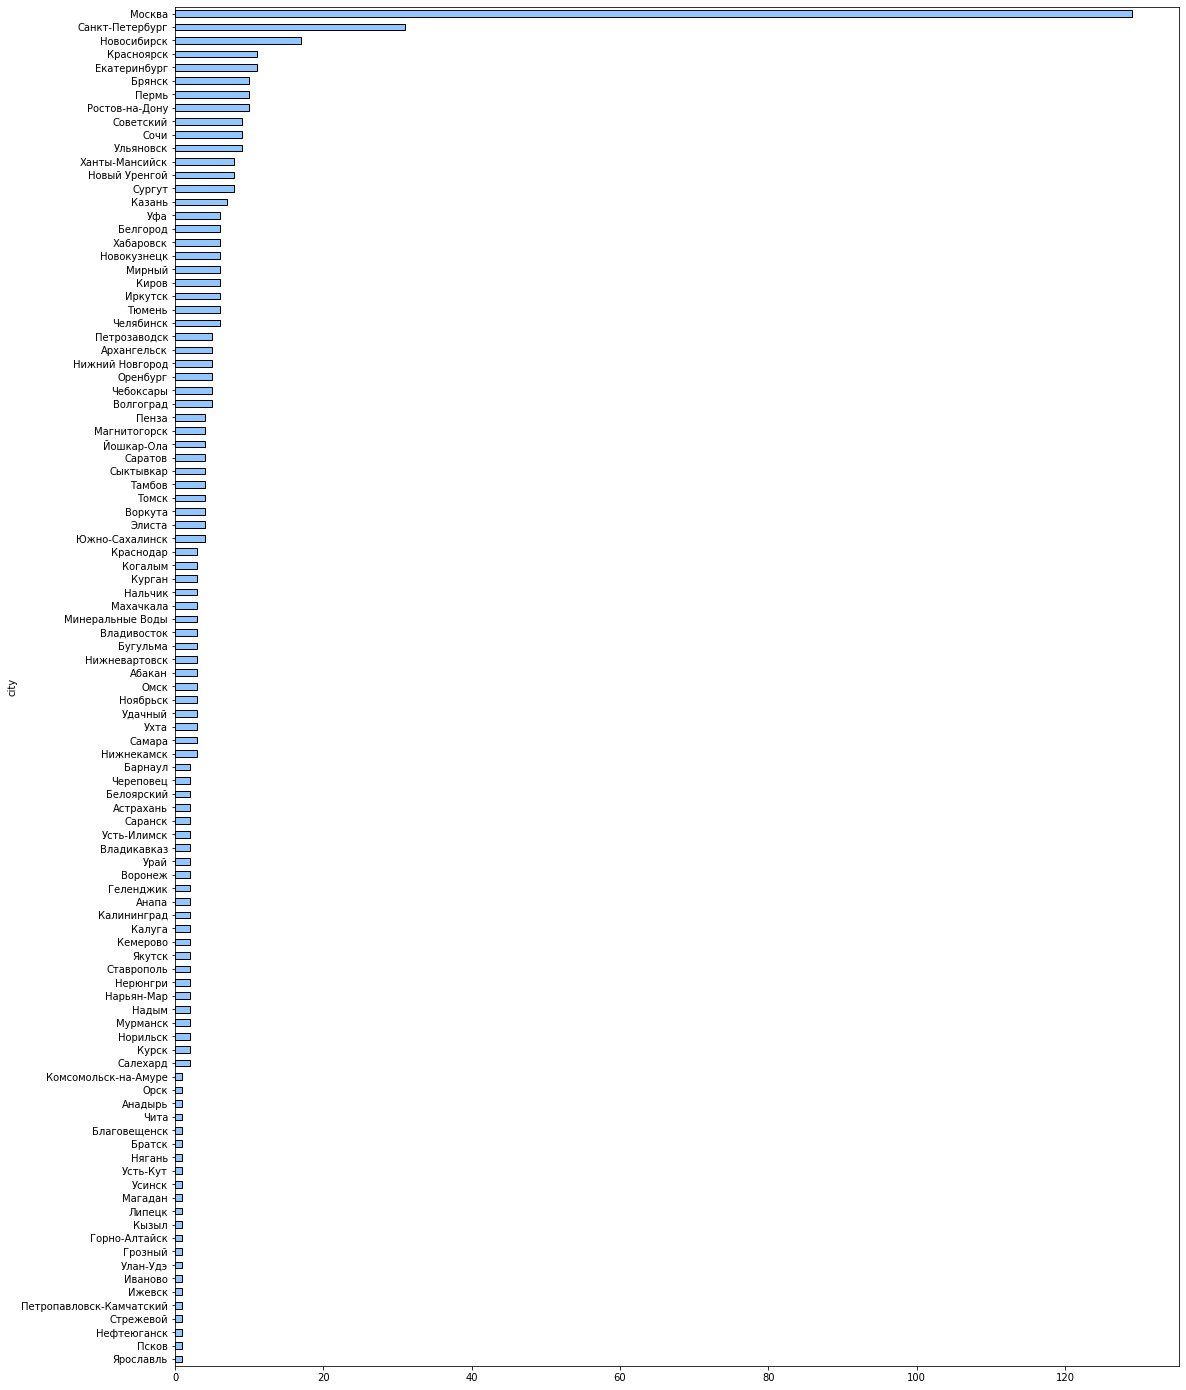

In [43]:
create_any_bar('city', 'sum', 'average_flights')

**Вывод:**

Ожидаемо, что Москва впереди — это транспортный пул в любое время года. Питер и Новосибирск занимают 2 и 3 место. Остальные города отличаются слабо. Что касается причин, почему меньше рейсов у других городов, исходя из данных которые я имею, могу сказать, что в остальных городах меньше население, кол-во аэропортов, а так же возможно данные были выгружены за будний день .

**Топ-10 городов и количество рейсов**

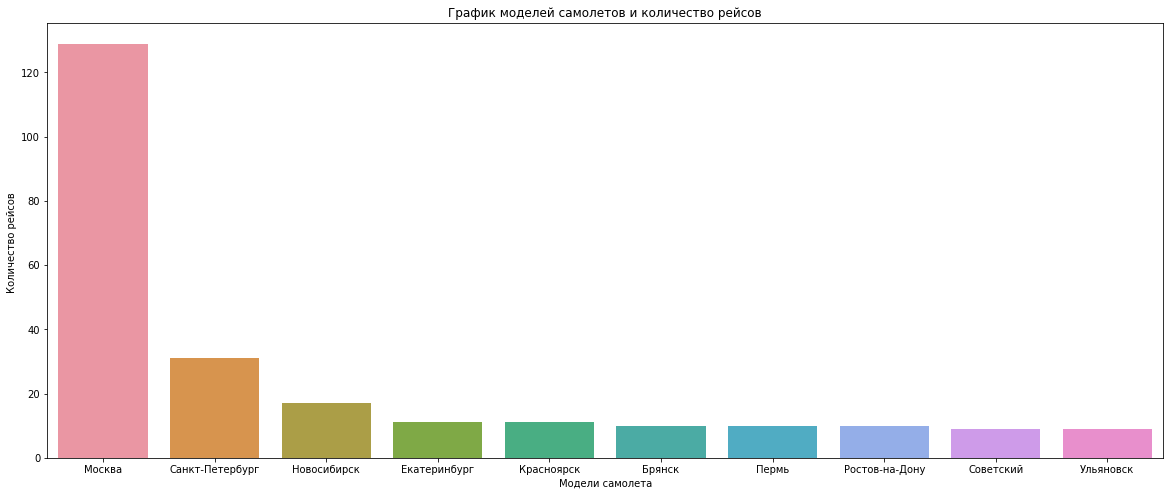

In [44]:
# Созданим функцию
platform_on_sales = top_10.pivot_table(
    index='city', values='average_flights', aggfunc='sum').sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['average_flights'])
plt.title("График моделей самолетов и количество рейсов")
plt.xlabel("Модели самолета")
plt.ylabel("Количество рейсов ");

**Вывод:**

Список городов, куда запланировано больше всего перелетов: 
* Возглавляет  Москва
    - 129 рейсов за день, не удивительно для столицы, в основном все рейсы осуществяются из, либо через Москву.
* На втором месте — Санкт-Петербург
    - 31 рейсов за день, культурная столица находится на втором месте по рейсам
* На третьем Новосибирск
    - 17 рейсов за день, в Сибири не так много рейсов, возможно их за расстояния, и разницы во времени 4 часа (возможно повлияло на выгрузку)

В остальных городах попавших в ТОП-10 всего около 10 перелетов. Странно что в ТОП не попал Сочи.

****

<a name="stage_3"></a>
# Вывод

**Мы сделали следующее:**

* открыли датафрейм, изулили общую информацию о таблицах, проверили тип данных, пропуска, дубли и анамалии в данных


* изучили данные по количеству перелетов за сентябрь 2018г. по каждой модели самолета, выяснили, что самыми используемыми моделями самолета (в сентябре 2018г.) являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;

    - Самолеты моделей Cessna 208 Caravan, Bombardier CRJ-200, и Sukhoi SuperJet-100 совершают значительно большее количество полетов по сравнению с другими моделями. Меньше всего перелетов у крупнейшего Boeing 777-300

    - Cessna 208 Caravan «Сессна 208» — лёгкий американский турбовинтовой одномоторный самолёт общего применения с шасси, которое не убирается. Небольшие самолеты на 9-13 мест, летают по небольшому количеству маршрутво и сугубо на короткие расстояния, обслуживают только направления с малым пассажиропотоком. И это логично, вместимость-то малая

    - Bombardier CRJ-200 имеют повышенные эксплуатационные характеристики: данный тип способен выполнять полёты в сложных метеорологических условиях и в условиях высокогорных аэродромов, самолет на 50 мест, география намного более объемная, чем у "Cessna". Летают на средние расстояния, присутствуют высокозагруженные направления (кроме Санкт-Петербург-Москва и обратно). Это Utair;

    - Sukhoi SuperJet-100 российский ближнемагистральный узкофюзеляжный пассажирский самолёт.вместимость - 98 мест. География похожа на географию Bombardier, а по частоте перелетов по маршруту Москва-Брянск и обратно можно угадать S7;

    - Boeing 767 рассчитан на 124 пассажиров. В основном летает за Урал;

    - Boeing 737-300 вместимость - 188 мест. География не сильно разнообразна. В основном летают из Москвы, есть одно направление из Санкт-Петербурга и локальные перелеты на юге;

    - Airbus A321-200 вместимость - 188 мест. География неразнообразна, основное направление - Санкт-Петербург-Москва. S7 - только они обеспечивают прямой перелет Санкт-Петербург-Иркутск

    - Boeing 777–300 — крупнейший в мире двухмоторный турбовентиляторный пассажирский лайнер, создан для дальнемагистральных рейсов. Хорош для дальних полетов, например междунородных. вместимость - 407 пассажиров. И удивительно, но география слабая, и перелеты на малые расстояния, видимо, у а/к всего один борт, если они его испсользуют таким образом
    
    
* построили график и посмотрели количество рейсов по отшошению к каждому городу, так же выделили топ 10 городов, где было совершено больше всего рейсов;